# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np


# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [12]:
# your code here
employees = pd.read_csv('./Employee.csv')
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [13]:
# Method 1
# your code here
employees.groupby('Department').mean()['Salary']

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [14]:
# Method 2
# your code here
employees.pivot_table(index=["Department"])['Salary']

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [16]:
# your code here
pd.pivot_table(employee, index=['Department', 'Title'], values='Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [19]:
# your code here
pd.pivot_table(employee, index='Title', columns='Years', values='Salary')

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [24]:
# your code here
employees.pivot_table(index=['Department','Title'],  aggfunc={'Salary': np.mean, 'Name': len})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [25]:
# your code here
df = pd.pivot_table(employee, index=['Department', 'Title'], values='Salary', aggfunc=[np.median, min, max, np.std]);
df

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [170]:
"""
The values in the rows with NaNs in the std are values calculated over a single item. That's why the mean, max and minimum are equal and the std is a null value, which could be replaced by a 0.
"""

"\nAnalysts have the maximum salaries within the company, doesn't really matter which department\n"

#### Based on your comments, fill the missing values with an appropriate value.

In [28]:
# your code here
df.fillna(0, inplace=True);
df

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [29]:
# your code here

pd.pivot_table(employee, index='Department', values='Salary', aggfunc=[len, sum])

,len,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [30]:
# your code here

pd.pivot_table(employee, 
               index=['Department', 'Title'], 
               values=['Years','Salary'], 
               aggfunc={'Years': np.sum, 'Salary': np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [31]:
# your code here

def mean_without_max(x):
    return x.sort_values()[:-1].mean()

In [32]:
pd.pivot_table(employee, 
               index='Department', 
               values='Salary', 
               aggfunc=mean_without_max)

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [34]:
# your code here
fitbit = pd.read_csv("./Fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [176]:
# your code here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [35]:
# your code here
fitbit[['Minutes Very Active','Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [37]:
import matplotlib.pyplot as plt;

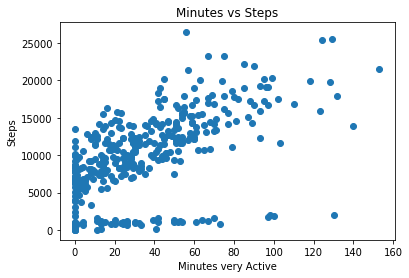

In [38]:
plt.scatter(fitbit['Minutes Very Active'],fitbit['Steps'])
plt.title("Minutes vs Steps")
plt.xlabel("Minutes very Active")
plt.ylabel("Steps")
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

There is a correlation between Minutes Very Active and Steps. As Minutes Very Active increases, Steps also increases. There is a positive linear relationship.

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [39]:
# your code here
fitbit[['Minutes Sedentary','Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

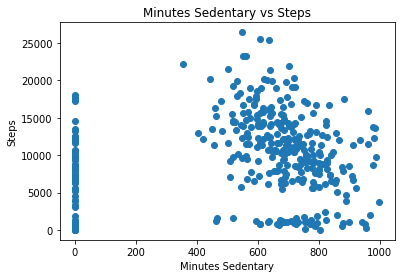

In [40]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'],fitbit['Steps'])
plt.title("Minutes Sedentary vs Steps")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

In [41]:
"""
It doesn't seem that there is linear relationship between the Minutes Sedentary and the number of Steps
"""

"\nIt doesn't seem that there is linear relationship between the Minutes Sedentary and the number of Steps\n"

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [42]:
# your code here
fitbit[['MinutesOfSleep','Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

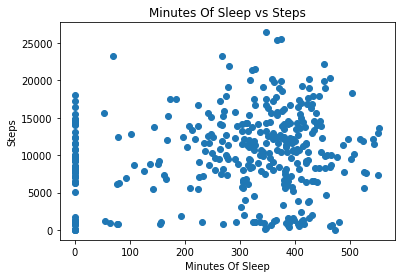

In [43]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'],fitbit['Steps'])
plt.title("Minutes Of Sleep vs Steps")
plt.xlabel("Minutes Of Sleep")
plt.ylabel("Steps")
plt.show()

In [44]:
"""
It doesn't seem that there is linear relationship between the Minutes of Sleep and the number of steps.
"""

"\nIt doesn't seem that there is linear relationship between the Minutes of Sleep and the number of steps.\n"

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [45]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[columns].corr()

In [46]:
# your code here
cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.005615,-0.213209,-0.227600,-0.120430,-0.487730
Steps,0.005615,1.000000,0.198114,-0.510837,0.682314,-0.361045
Floors,-0.213209,0.198114,1.000000,-0.463588,0.377698,-0.398123
Minutes Sedentary,-0.227600,-0.510837,-0.463588,1.000000,-0.469978,0.053956
Minutes Very Active,-0.120430,0.682314,0.377698,-0.469978,1.000000,-0.408228
MinutesOfSleep,-0.487730,-0.361045,-0.398123,0.053956,-0.408228,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [47]:
# your code here
cor_fit.sort_values(by="Steps", ascending=False)


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


In [48]:
print("The highest correlations are on the Minutes Very Active and Floors")

The highest correlations are on the Minutes Very Active and Floors


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [52]:
# your code here
time_grades = pd.read_csv("./Time_Grades.csv")

time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

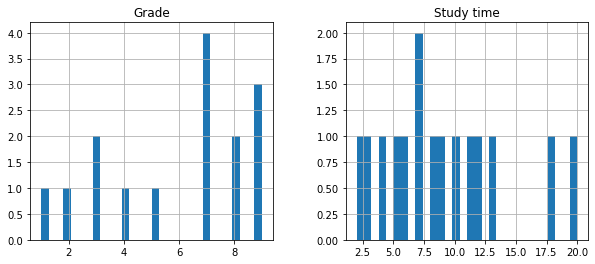

In [53]:
# your code here
time_grades.hist(figsize=(10,4), bins=30)
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [54]:
# your code here
time_grades['Study time'].corr(time_grades['Grade'])

0.7980456073578858

In [55]:
time_grades['Study time'].corr(time_grades['Grade'], method='spearman')

0.819658753036942

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

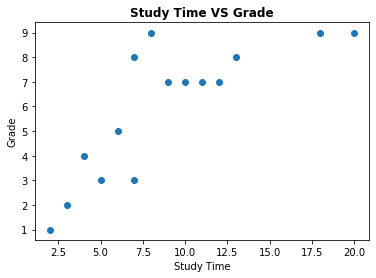

In [56]:
# your code here
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.title('Study Time VS Grade', fontweight=700)
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.show()

#### Could you explain the difference between Pearson and Spearman correlations?

- Spearman correlation is a special case of Pearson's correlation.

- The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables (the variables tend to change together, but not necessarily at a constant rate).

- The Pearson correlation evaluates the linear relationship between two continuous variables (a change in one variable is associated with a proportional change in the other variable).